<a href="https://colab.research.google.com/github/FedericoRaschiatore0123/GATr_Deep_Learning_Project/blob/main/GATr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#collego le cartelle di Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#librerie
!pip install h5py
!pip install trimesh
!pip install torch_geometric

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras #libreria delle reti neurali
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import shutil


import torch
import torch_geometric.data
from torch_geometric.data import Data

import h5py
import os

In [ ]:
import gzip
import shutil
import tarfile
import os
import glob
import sys
import torch
import torch.nn as nn
import numpy as np
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    #if torch.__version__.startswith("2.1.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    #else:
        # We try to install PyTorch3D from source.
        #!pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

import matplotlib.pyplot as plt

# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes, load_obj

# Data structures and functions for rendering
from pytorch3d.structures import Meshes
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene
from pytorch3d.vis.texture_vis import texturesuv_image_matplotlib
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    PointLights,
    DirectionalLights,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    TexturesUV,
    TexturesVertex
)

!wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
from plot_image_grid import image_grid

!pip install trimesh
import trimesh


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=d78d60caecb4157abe5642a01890212a198ab3e7ab270671aadcea716ae4a951
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=6cdfd6718ad239bef7ca85dbc5797bc30046f6b37c060d5d28039c51fe041634
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py310_cu121_pyt221/download.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 81.2 MB/s eta 0:00:00
--2024-

In [ ]:
#utilizzo una GPU

if torch.cuda.is_available():
    device_name = torch.device("cuda")
else:
    device_name = torch.device('cpu')

In [ ]:
#caricamento del dataset, formato hdf5
bifurcating = "/content/drive/MyDrive/dati_progetto/bifurcating/raw/database.hdf5"
single = "/content/drive/MyDrive/dati_progetto/single/raw/database.hdf5"


In [ ]:
data_folder = single # {single, bifurcating}

f = h5py.File(data_folder, 'r')

# List of all the samples contained in data_folder
list_ = list(f.keys())


In [ ]:
print(list_)
print(list(f['sample_0000'].keys()))
for element in f['sample_0000']:
  print(f['sample_0000'][element][:])

['sample_0000', 'sample_0001', 'sample_0002', 'sample_0003', 'sample_0004', 'sample_0005', 'sample_0006', 'sample_0007', 'sample_0008', 'sample_0009', 'sample_0010', 'sample_0011', 'sample_0012', 'sample_0013', 'sample_0014', 'sample_0015', 'sample_0016', 'sample_0017', 'sample_0018', 'sample_0019', 'sample_0020', 'sample_0021', 'sample_0022', 'sample_0023', 'sample_0024', 'sample_0025', 'sample_0026', 'sample_0027', 'sample_0028', 'sample_0029', 'sample_0030', 'sample_0031', 'sample_0032', 'sample_0033', 'sample_0034', 'sample_0035', 'sample_0036', 'sample_0037', 'sample_0038', 'sample_0039', 'sample_0040', 'sample_0041', 'sample_0042', 'sample_0043', 'sample_0044', 'sample_0045', 'sample_0046', 'sample_0047', 'sample_0048', 'sample_0049', 'sample_0050', 'sample_0051', 'sample_0052', 'sample_0053', 'sample_0054', 'sample_0055', 'sample_0056', 'sample_0057', 'sample_0058', 'sample_0059', 'sample_0060', 'sample_0061', 'sample_0062', 'sample_0063', 'sample_0064', 'sample_0065', 'sample_0

In [ ]:
# Data_Preprocessing class is used to convert the data in torch objects and normalize the data

class Data_Preprocessing:
    def __init__(self, data_path):
        self.data_path = data_path
        self.file = h5py.File(data_path, 'r')

    def hdf5_to_torch(self, sample_id):
      # This method is used to convert hdf5 data to a torch object
      # sample_id: name of the sample that needs to be converted to torch object

        data = Data(
            wss=torch.from_numpy(self.file[sample_id]['wss'][()]),
            pos=torch.from_numpy(self.file[sample_id]['pos'][()]),
            face=torch.from_numpy(self.file[sample_id]['face'][()].T).long(),
            inlet_index=torch.from_numpy(self.file[sample_id]['inlet_idcs'][()])
        )
        return data

    def normalize_data(self, torch_obj):
      # This method is used to apply the normalization to all attributes of the torch object

        torch_obj.wss = self.normalize_tensor(torch_obj.wss)
        torch_obj.pos = self.normalize_tensor(torch_obj.pos)
        #torch_obj.inlet_index = self.normalize_tensor(torch_obj.inlet_index)
        return torch_obj

    def normalize_tensor(self, tensor):
        mean = torch.mean(tensor, dim=0)
        std = torch.std(tensor, dim=0)
        normalized_tensor = (tensor - mean) / std
        return normalized_tensor

# Example Usage:

# Instantiation of the preprocessor in the single and bifurcating case
preprocessor_single = Data_Preprocessing(data_path=single)
preprocessor_bifurcating = Data_Preprocessing(data_path=bifurcating)


# Load and normalize data for a specific sample
# sample_id = "sample_0000"
# data = preprocessor_single.hdf5_to_torch(sample_id)
# normalized_data = preprocessor_single.normalize_data(data)

In [ ]:
# TO DO: Add Data Augmentation class
#(rotate, )
#class Data_Augmentation:



In [ ]:
# Manage_Folders class is used to create and remove folders
# Used to create a training dataset folder and a test dataset folder

class Manage_Folders():
  def __init__(self):
        pass

  @staticmethod
  def create_folder(parent_folder, new_folder_name):
    #use this method to create folder "new_folder_name" within "parent_folder"
      new_folder = os.path.join(parent_folder, new_folder_name) # path to the new folder
      if not os.path.exists(new_folder):
          try:
              os.makedirs(new_folder)
              print(f"Folder '{new_folder_name}' successfully created in '{parent_folder}'.")
          except Exception as e:
              print(f"An error occurred during the creation of '{new_folder_name}': {e}")
      else:
          print(f"Folder '{new_folder}' already exists in '{parent_folder}'.")


  @staticmethod
  def delete_folder(folder_path):
    #use this method to remove a folder AND its content

    if os.path.exists(folder_path):
      try:
          shutil.rmtree(folder_path)
          print(f"Folder '{folder_path}' successfully deleted.")
      except Exception as e:
          print(f"An error occurred while deleting '{folder_path}': {e}")
    else:
      print(f"Folder '{folder_path}' does not exist.")


# Example usage of the class:
parent_folder = "/content/gdrive/MyDrive/dati_progetto"
train_folder = "train"
test_folder = "test"

# create train and test folders:
Manage_Folders.create_folder(parent_folder, train_folder)
Manage_Folders.create_folder(parent_folder, test_folder)


# delete the folders that were just created:
train_folder_path = os.path.join(parent_folder, train_folder)
test_folder_path = os.path.join(parent_folder, test_folder)


Manage_Folders.delete_folder(train_folder_path)
Manage_Folders.delete_folder(test_folder_path)

Folder 'train' successfully created in '/content/gdrive/MyDrive/dati_progetto'.
Folder 'test' successfully created in '/content/gdrive/MyDrive/dati_progetto'.
Folder '/content/gdrive/MyDrive/dati_progetto/train' successfully deleted.
Folder '/content/gdrive/MyDrive/dati_progetto/test' successfully deleted.


In [ ]:
# preprocessing of the "single" data samples
data = []

for sample in list_:
  torch_sample = f"torch_{sample}"; # define the name of each torch sample
  torch_sample = preprocessor_single.hdf5_to_torch(sample) # convert hdf5 samples to torch samples
  torch_sample = preprocessor_single.normalize_data(torch_sample)
  #print(torch_sample.pos.shape) #print the feature "pos" of the data obj
  print(torch_sample)
  data.append(torch_sample)


In [ ]:
def embed_point(coordinates: torch.Tensor) -> torch.Tensor:

    # Create multivector tensor with same batch shape, same device, same dtype as input
    batch_shape = coordinates.shape[:-1]
    multivector = torch.zeros(*batch_shape, 16, dtype=coordinates.dtype, device=coordinates.device)

    # Embedding into trivectors
    # Homogeneous coordinates: unphysical component / embedding dim, x_123
    multivector[..., 14] = 1.0
    multivector[..., 13] = -coordinates[..., 0]  # x-coordinate embedded in x_023
    multivector[..., 12] = coordinates[..., 1]  # y-coordinate embedded in x_013
    multivector[..., 11] = -coordinates[..., 2]  # z-coordinate embedded in x_012

    return multivector

print(embed_point(data[0].pos).shape)
print(embed_point(data[0].pos)[0])
print(data[0].pos)
print(data[0].wss)
print(data[0].inlet_index)

torch.Size([10475, 16])
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.1904, 2.0394, 1.6165, 1.0000, 0.0000])
tensor([[-1.6165,  2.0394, -1.1904],
        [-1.6060,  1.9804, -1.1078],
        [-1.6024,  2.0493, -1.2855],
        ...,
        [-1.6366,  2.2755,  0.7679],
        [ 1.7071, -1.0092,  0.2835],
        [ 1.7091, -0.9229,  0.3342]])
tensor([[ 0.2622, -0.7208,  0.0207],
        [ 0.1633, -0.6400, -0.0267],
        [ 0.1670, -0.6583,  0.0115],
        ...,
        [-0.5665,  0.1508,  0.0075],
        [-0.5665,  0.1508,  0.0075],
        [-0.5665,  0.1508,  0.0075]])
tensor([ 4904,  4903,  4905,  4906,  6278,  6277, 10084,  5821,  5822, 10085,
         5105,  5104,  5106,  5107,  8214,  8213, 10086,  5942,  5943, 10087,
         5364,  5363,  5362, 10090, 10091,  5365,  6032,  6033,  5810,  5809,
         5811,  5812,  5817,  5816, 10092,  8719,  9447, 10093,  5819,  5818,
        10094, 10095, 10096, 10097, 10099, 1010

In [ ]:
!pip install clifford

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.3/159.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00


I vertici di una mesh possono essere rappresentati come vettori in GA. In uno spazio tridimensionale, un vertice con coordinate

(x,y,z) può essere espresso come
xe1
+
xe
2
+
xe
3
xe
1
​
 +ye
2
​
 +ze
3
​
 , dove
e
1

​,
e
2
, e
e
3
sono i vettori base dello spazio.

https://clifford.readthedocs.io/en/latest/tutorials/g2-quick-start.html

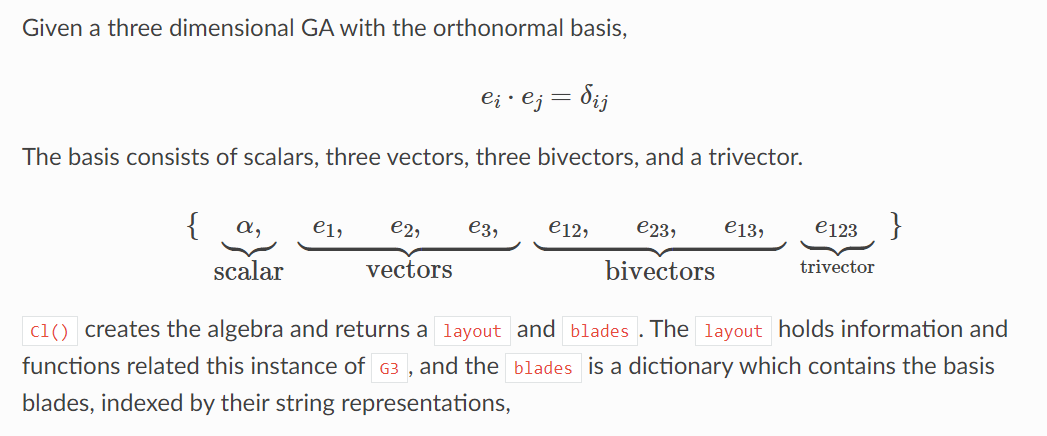

In [ ]:
data[0].face

tensor([[    1,     2,     4,  ..., 10468, 10380, 10432],
        [    0,     3,     5,  ..., 10353, 10468, 10353],
        [    2,     4,     6,  ..., 10328, 10328, 10468]])

In [ ]:
import numpy as np

def compute_outer_product_matrices(vertices, normals, radius, adjacency_list):
    """
    Calcola le matrici di prodotto esterno per ogni vertice e ne fa la media nel vicinato.

    :param vertices: numpy array di forma (N, 3) con le posizioni dei vertici.
    :param normals: numpy array di forma (N, 3) con le normali di superficie per ogni vertice.
    :param radius: Raggio entro cui cercare i vicini per ogni vertice.
    :param adjacency_list: Lista di adiacenza che definisce i vicini per ogni vertice.
    :return: Dizionario con le matrici medie per ogni vertice.
    """
    avg_matrices = {'self_dot': [], 'normal_dot': [], 'cross_dot': []}

    for i, p in enumerate(vertices):
        # Trova i vicini di p entro un certo raggio usando l'adjacency_list
        neighbors = adjacency_list[i]

        self_dot_matrices = []
        normal_dot_matrices = []
        cross_dot_matrices = []

        for q_idx in neighbors:
            q = vertices[q_idx]
            n_q = normals[q_idx]

            # Vettore da p a q
            v_pq = q - p

            # Calcolo delle matrici
            self_dot_matrix = np.outer(v_pq, v_pq)
            normal_dot_matrix = np.outer(n_q, n_q)
            cross_dot_matrix = np.outer(v_pq, n_q)

            # Aggiungiamo le matrici alla lista
            self_dot_matrices.append(self_dot_matrix)
            normal_dot_matrices.append(normal_dot_matrix)
            cross_dot_matrices.append(cross_dot_matrix)

        # Calcolo delle medie
        avg_matrices['self_dot'].append(np.mean(self_dot_matrices, axis=0))
        avg_matrices['normal_dot'].append(np.mean(normal_dot_matrices, axis=0))
        avg_matrices['cross_dot'].append(np.mean(cross_dot_matrices, axis=0))

    return avg_matrices

# Esempio di utilizzo:
# Supponiamo di avere 'vertices' e 'normals' come numpy arrays delle giuste dimensioni,
# e 'radius' definito, con 'adjacency_list' che rappresenta la lista di adiacenza per i vicini.
# avg_matrices = compute_outer_product_matrices(vertices, normals, radius, adjacency_list)


In [ ]:
import clifford
from clifford.g3 import *  # g3 è lo spazio geometrico 3D
import numpy as np

e1 = blades['e1']
e2 = blades['e2']
e3 = blades['e3']

verticies = []

for element in data[0:10]:
  pos = np.array(element.pos, dtype=float)
  # Converti i vertici in vettori GA
  ga_verts = [e1*p[0] + e2*p[1] + e3*p[2] for p in pos]
  verticies.append(ga_verts)
  print(pos[0])
  print(ga_verts)
  break

normal = []
for i in range(len(data[0:10])):
  element = data[i]
  for j in range(len(element.face[0])):
    v1 = element.face[0][j].item()
    v2 = element.face[1][j].item()
    v3 = element.face[2][j].item()
    print(v1, v2, v3)
    p1 = verticies[i][v2] - verticies[i][v1]
    p2 = verticies[i][v3] - verticies[i][v1]
    surface = p1 ^ p2
    # Calcolo della normale alla superficie (duale del bivettore)
    nor = surface.dual()
    #nor = nor/(nor.norm()) #normalizzazione della normale
    normal.append(nor)


[-1.61646056  2.03936434 -1.19044924]
[-(1.61646^e1) + (2.03936^e2) - (1.19045^e3), -(1.60602^e1) + (1.98045^e2) - (1.10779^e3), -(1.60238^e1) + (2.04934^e2) - (1.28552^e3), -(1.61205^e1) + (2.1126^e2) - (1.34769^e3), -(1.59763^e1) + (2.12477^e2) - (1.41302^e3), -(1.60639^e1) + (2.19243^e2) - (1.45171^e3), -(1.59181^e1) + (2.20581^e2) - (1.48621^e3), -(1.59987^e1) + (2.27463^e2) - (1.49083^e3), -(1.58556^e1) + (2.28984^e2) - (1.49176^e3), -(1.59399^e1) + (2.3593^e2) - (1.46516^e3), -(1.57935^e1) + (2.37336^e2) - (1.43521^e3), -(1.58799^e1) + (2.44125^e2) - (1.37763^e3), -(1.57342^e1) + (2.45196^e2) - (1.31854^e3), -(1.58231^e1) + (2.51574^e2) - (1.23266^e3), -(1.56808^e1) + (2.52158^e2) - (1.1494^e3), -(1.57724^e1) + (2.57914^e2) - (1.03999^e3), -(1.56365^e1) + (2.57862^e2) - (0.9407^e3), -(1.57311^e1) + (2.62768^e2) - (0.81336^e3), -(1.56051^e1) + (2.62152^e2) - (0.69256^e3), -(1.57115^e1) + (2.66419^e2) - (0.56507^e3), -(1.55867^e1) + (2.65118^e2) - (0.42085^e3), -(1.58383^e1) + (2.1

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


KeyboardInterrupt: 

In [ ]:
print(len(normal))

0


In [ ]:
# Numero di vertici nella mesh
num_vertices = len(verticies) + 1

# Inizializza la matrice di adiacenza con zeri
adjacency_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

# Popola la matrice di adiacenza
for k in len(element.faces[0]):
    for i in range(3):  # Cicla attraverso i vertici della faccia
        for j in range(i + 1, 3):  # Evita di ripetere le coppie e di includere (i, i)
            adjacency_matrix[face[i], face[j]] = 1
            adjacency_matrix[face[j], face[i]] = 1  # Assicura la simmetria

print(adjacency_matrix)


In [ ]:
# Calcolo dei vettori
v_pq = q - p  # Vettore da p a q

# Calcolo dei prodotti esterni (outer products)
# In GA, il prodotto esterno di due vettori produce un bivettore, non una matrice 3x3.
# Tuttavia, possiamo interpretare il concetto analogamente per i nostri scopi.

# Per i nostri scopi, calcoliamo il prodotto geometrico, che in clifford è dato da *
prod_pq_pq = v_pq * v_pq
prod_nq_nq = n_q * n_q
prod_pq_nq = v_pq * n_q


3.4 Input features
We construct input features f
in : V → R
cin with cin channels
that describe the local shape of ∂Ω as well as global properties and are computed from the mesh M. In particular,
we compute a surface normal for each vertex p ∈ V from
adjacent mesh faces. We then construct three matrices that
describe the local neighbourhood q ∈ Br(p) ∩ V by, for each
neighbour q, taking the outer products of
• the vector from p to q with itself,
• the surface normal at q with itself, and
• the vector from p to q with the surface normal at q
For each of the three resulting sets of (3 × 3)-matrices, we
take the average over the neighbourhood. Two of these
matrices are symmetric by construction, so we can drop
entries without losing information. The radius r of the
local neighbourhood balls is a hyperparameter and must be
chosen based on the structure of the input meshes, so that
no neighbourhood is disconnected, i.e. consists of a single
vertex. We chose the same radius that is used to construct
the mesh’s “latent” computation graph (V0, E0).
The motivation behind these input features is that they
define meaningful local surface descriptors that are not
SO(2)-invariant, a precursor to employing GEM convolution [31]. In contrast, the vanilla surface normal would
simply be constant in any coordinate system induced by the
surface normal. Since the surface normal describes the local
surface (orientation) in an infinitesimally small neighbourhood Br→0(p), i.e. the precise local curvature of the artery
wall ∂Ω, it is the preferred input feature for conventional
message passing formulations.
We can extend the per-vertex features with any scalar or
vector field. Since we assume that hemodynamics depend
on flow direction, we append the shortest geodesic distance
from each vertex p to the inflow surface, which we compute
with the vector heat method [34]. Moreover, we add global
parameters such as blood-flow boundary conditions as a
constant scalar field over the vertices.

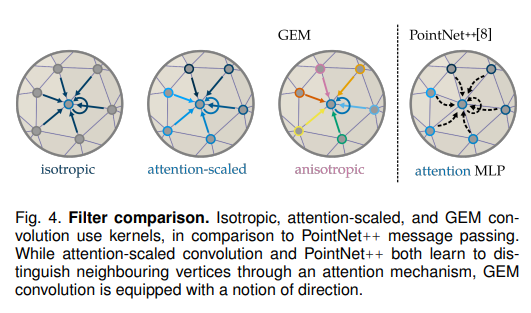